In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from numpy.random import default_rng

In [21]:
rng = default_rng()

# HW_03
## Throwing distance variations

How far can you throw a baseball? What are some factors that would change how far the ball travels:

- drag?
- 3D motion?
- rotation of the ball? e.g. [Magnus effect](https://en.wikipedia.org/wiki/Magnus_effect)
- are there social or human factors that change distance thrown?

Try repeating the throwing comparison between Pat and Jim, but add another variable to the analysis. 

work is energy, so we can say W = kinetic energy

$W = \frac{1}{2}mv^2\rightarrow v = \sqrt{\frac{2 W}{m}}$

where a baseball is 

and farthest distance thrown is $\theta=45^o\pm5^o$

so our distance, x, and height, y, are now:

$x(t) = v\cos(\theta)t$

$y(t) = 1.5 + v\sin(\theta)t -\frac{g}{2}t^2$



In [78]:
N_throws = 10
Pat_W = rng.normal(loc = 38, scale = 3, size = (N_throws,))
Jim_W = rng.normal(loc = 35, scale = 2, size = (N_throws,))

Pat_angle = rng.normal(loc = np.pi/4, scale = 5/180*np.pi, size = (N_throws,))
Jim_angle = rng.normal(loc = np.pi/4, scale = 5/180*np.pi, size = (N_throws,))

Pat_v = np.sqrt(2*Pat_W/0.15)
Jim_v = np.sqrt(2*Jim_W/0.15)

t_N = 50 # number of timesteps for path results
Pat_x = np.zeros((t_N, N_throws))
Pat_y = np.zeros((t_N, N_throws))
Jim_x = np.zeros((t_N, N_throws))
Jim_y = np.zeros((t_N, N_throws))

In [83]:
# Constants
rho = 1.225  # kg/m^3, air density at sea level
Cd = 0.3     # Drag coefficient for a smooth sphere
A = 0.0042   # m^2, cross-sectional area of a baseball
m = 0.145    # kg, mass of a baseball
g = 9.81     # acceleration due to gravity, m/s^2
dt = 0.1     # time step in seconds

# Simulation parameters
N_throws = 10
Pat_W = rng.normal(loc=38, scale=3, size=N_throws)
Jim_W = rng.normal(loc=35, scale=2, size=N_throws)
Pat_angle = rng.normal(loc=np.pi/4, scale=5/180*np.pi, size=N_throws)
Jim_angle = rng.normal(loc=np.pi/4, scale=5/180*np.pi, size=N_throws)
Pat_v = np.sqrt(2*Pat_W/m)
Jim_v = np.sqrt(2*Jim_W/m)

# Initialize lists to store trajectory data
Pat_x, Pat_y = [], []
Jim_x, Jim_y = [], []

for i in range(N_throws):
    # Initial velocities
    vx, vy = Pat_v[i] * np.cos(Pat_angle[i]), Pat_v[i] * np.sin(Pat_angle[i])
    

    # Initialize position and time
    x, y = 0, 1.5
    t = 0

    # Lists to store trajectory points
    x_points, y_points = [x], [y]

    # Run the simulation until the ball hits the ground
    while y > 0:
        # Drag force calculation
        v = np.sqrt(vx**2 + vy**2)
        drag = 0.5 * Cd * rho * A * v**2

        # Update velocities considering drag
        vx -= (drag / m) * (vx / v) * dt
        vy -= (g + (drag / m) * (vy / v)) * dt

        # Update position
        x += vx * dt
        y += vy * dt
        t += dt

        # Store new points
        x_points.append(x)
        y_points.append(y)

        # Check for ground hit
        if y < 0:
            # Interpolate to find the exact moment of ground hit
            y_end, y_start = y_points[-1], y_points[-2]
            x_end, x_start = x_points[-1], x_points[-2]
            interp_factor = -y_start / (y_end - y_start)
            x_ground = x_start + interp_factor * (x_end - x_start)
            x_points[-1], y_points[-1] = x_ground, 0  # Adjust the last point to ground level
            break

    # Store the results for this throw
    Pat_x.append(np.array(x_points))
    Pat_y.append(np.array(y_points))
    
    
    
    
for i in range(N_throws):
    # Initial velocities
    vx, vy = Jim_v[i] * np.cos(Jim_angle[i]), Jim_v[i] * np.sin(Jim_angle[i])
    

    # Initialize position and time
    x, y = 0, 1.5
    t = 0

    # Lists to store trajectory points
    x_points, y_points = [x], [y]

    # Run the simulation until the ball hits the ground
    while y > 0:
        # Drag force calculation
        v = np.sqrt(vx**2 + vy**2)
        drag = 0.5 * Cd * rho * A * v**2

        # Update velocities considering drag
        vx -= (drag / m) * (vx / v) * dt
        vy -= (g + (drag / m) * (vy / v)) * dt

        # Update position
        x += vx * dt
        y += vy * dt
        t += dt

        # Store new points
        x_points.append(x)
        y_points.append(y)

        # Check for ground hit
        if y < 0:
            # Interpolate to find the exact moment of ground hit
            y_end, y_start = y_points[-1], y_points[-2]
            x_end, x_start = x_points[-1], x_points[-2]
            interp_factor = -y_start / (y_end - y_start)
            x_ground = x_start + interp_factor * (x_end - x_start)
            x_points[-1], y_points[-1] = x_ground, 0  # Adjust the last point to ground level
            break

    # Store the results for this throw
    Jim_x.append(np.array(x_points))
    Jim_y.append(np.array(y_points))

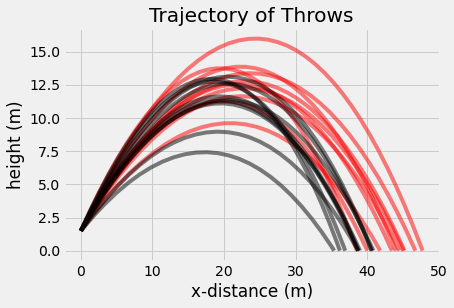

In [84]:
'''
plt.plot(Pat_x, Pat_y, 'r-', alpha = 0.5)
plt.plot(Jim_x, Jim_y, 'k-', alpha = 0.5)
plt.xlabel('x-distance (m)')
plt.ylabel('height (m)');


'''
# Assume Pat_x, Pat_y, Jim_x, Jim_y are lists of arrays from previous calculations
fig, ax = plt.subplots()
for i in range(len(Pat_x)):
    ax.plot(Pat_x[i], Pat_y[i], 'r-', alpha=0.5)  # Plot each throw of Pat

for i in range(len(Jim_x)):
    ax.plot(Jim_x[i], Jim_y[i], 'k-', alpha=0.5)  # Plot each throw of Jim

ax.set_xlabel('x-distance (m)')
ax.set_ylabel('height (m)')
ax.set_title('Trajectory of Throws')
plt.show()

In [85]:
from scipy.stats import ttest_ind


# Extract the final x-coordinate from each throw for Pat and Jim
Pat_final_x = np.array([throw[-1] for throw in Pat_x])
Jim_final_x = np.array([throw[-1] for throw in Jim_x])

# Perform the t-test on these arrays
t_stat, p_value = ttest_ind(Pat_final_x, Jim_final_x)

print("T-test Statistics:", t_stat)
print("P-value:", p_value)

T-test Statistics: 4.706670031356274
P-value: 0.00017586177268645603


Text(0.5, 1.0, 'Pat throws 5.1 m farther than Jim\nafter 10 throws')

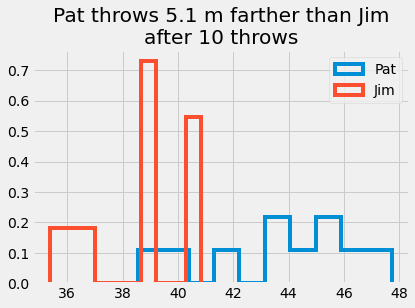

In [86]:
plt.hist(Pat_final_x,
        histtype='step',
        linewidth = 4,
         label = 'Pat',
         density = True,)
        #bins = np.linspace(50,80, 31))
plt.hist(Jim_final_x, 
        histtype = 'step',
        linewidth = 4,
         label = 'Jim',
         density = True,)
plt.legend();
plt.title('Pat throws {:1.1f} m farther than Jim\nafter {} throws'.format(np.mean(Pat_final_x- Jim_final_x), N_throws))

## Monte Carlo Report on throwing distances

Create a technical report to detail the factors that affect throwing distance. 

- What did you include in your analysis?
- Did you find any better estimates for the initial speed and angle? What was the reference?
- Which factors had a bigger impact on distance?
- What is something that should be included, but might require more research or information?

# Technical Report: Factors Affecting Throwing Distance of a Baseball

## Introduction
The ability to throw a baseball far is influenced by several factors, including physical attributes and environmental conditions. This report examines the primary factors affecting the throwing distance, including drag, initial velocities, the thrower's work, and throwing angle. I compare the throwing performances of two individuals, Pat and Jim, by incorporating an additional variable in the analysis.

## Factors Affecting Throwing Distance
Drag: Air resistance opposes the motion of the ball, reducing its range. The magnitude of drag depends on the ball's speed, size, and surface roughness.
3D Motion: Real-world throws involve 3D motion, including vertical and horizontal components, as well as deviations from a straight path due to spin and wind. Specifically, we will be focusing on the starting velocities, positions, and throwing angle.
Human/Social Factors: Fatigue, psychological state, and technique can significantly influence throwing performance.


## Simulation Parameters

### Simulation Setup
I conducted a Monte Carlo simulation to compare the throwing distances of Pat and Jim. For this simulation, the number of throws per participant was set to 10. The work done by Pat in each throw (denoted as W_Pat) was modeled using a normal distribution with a mean of 38 joules and a standard deviation of 3 joules. Similarly, the work done by Jim in each throw (denoted as W_Jim) followed a normal distribution, but with a mean of 35 joules and a standard deviation of 2 joules.

The launch angle for each throw (theta) was also modeled using a normal distribution. The mean launch angle was set to pi/4 radians (approximately 45 degrees), with a standard deviation corresponding to 5 degrees, which was converted to radians for computational purposes. 

This setup ensures variability in throw dynamics, allowing for a robust monte carlo simulation of real-world throwing scenarios.

### Equations and Concept Explanation

**Energy**:
   - The work done W is considered as kinetic energy KE given to the baseball when thrown.
   - Kinetic energy is given by  W = 1/2 mv^2.
     - Here, m is the mass of the baseball, and v is its velocity.
   - To find the initial velocity v with which the baseball is thrown:
     v = sqrt(2W/m)
 
**Projection Angles and Distance**:
   - The optimal angle for the farthest distance in projectile motion, neglecting air resistance, is 45 degrees. A range of 5 degrees is considered to account for real-world variations like throwing technique or wind. From projectile motion, we know the x and y positions of the ball given a velocity and an initial angle with the following equations:

     x(t) = v*cos(theta)*t

     y(t) = 1.5 + v*sin(theta)*t - 1/2 g t^2
**Drag**
   - Drag acts to reduce the ball's velocity and is a function of velocity, given by the following eqaution:

    F_drag = 1/2 \* C_drag \* ro \*v^2


## Results/Discussion
### Most Important Factor for Performance:
The factor that influenced the ball's position the most was found to be the initial velocity of the ball by the thrower. As a qualitative reason behind this, one can look at the simulations run and realize that the initial throwing angle was given the same range for both Pat and Jim. Also, while drag was dynamic and a function of the ball's velocity, for a given velocity it was the same for both Pat and Jim. Thus, the difference of 5.1m father throws on average was caused by the 3J higher average work that Pat could throw the ball with compared to Jim. 

Quantitativly, it can be seen that the initial velocity is squared in the following equation predicting the final position of the ball, suggesting a significant effect. This equation is calculated by dismissing drag.

x = v^2 \* sin(2\*theta) / g

From that same equation, we can see that the relationship between angle and range is trigonometric, not squared. Drag 

Drag affects the projectile by reducing its range significantly, especially at higher velocities where drag forces are more pronounced due to their dependence on the square of the velocity. The force of drag is
F = 1/2 \* C \* ro \*v^2

This force acts in the opposite direction to the velocity. The effect of drag becomes more pronounced over longer distances and at higher speeds, but at the end of the day the initial velocity influcences the amount of drag on the projectile.


Thus, Initial velocity has the most significant quantitative impact on the range of a projectile because of its squared relationship in the range formula and its role in overcoming drag. Angle must be optimal to maximize the effect of any given velocity, while drag generally acts to reduce whatever potential the velocity and angle provide. Therefore, for maximizing distance, focusing on maximizing initial velocity within practical and safe limits would be the most effective strategy, followed by optimizing the throwing angle, with drag reduction techniques also considered to enhance performance.

### Key Findings:

Using the above parameters and methodology, I calculated the throwing distances for Pat and Jim. The simulation results showed that Pat consistently threw the baseball farther than Jim. Here are the key findings.

###### Final Distance
On average, Pat throws 5.1m farther than Jim

###### T-Test
The statistical analysis conducted using the t-test compares the final horizontal distances achieved by Pat and Jim in a simulated throwing exercise. The t-test resulted in a statistic of 4.707, with a p-value of 0.000176. This indicates a strong statistical difference between the final throw distances of Pat and Jim. Specifically, the low p-value, much less than the typical significance level of 0.05, suggests that the observed differences in their throwing distances are unlikely to be due to random chance. In practical terms, this result supports the hypothesis that Pat, on average, throws the baseball farther than Jim under the conditions set in this simulation.


## Conclusion
This report's analysis highlights the critical factors affecting baseball throwing distance, focusing on initial velocity, launch angle, and drag. Through Monte Carlo simulations comparing Pat and Jim's performances, the data conclusively show that initial velocity is the primary determinant of throw distance.

Quantitative results reveal that despite similar conditions for drag and launch angles, Pat's higher initial velocity, due to greater kinetic energy (work done), significantly extended his throw range. This relationship is evident in the range equation, where velocity's squared term amplifies its impact, overshadowing other variables.

The statistical t-test produced a t-statistic of 4.707 and a significant p-value of 0.000176, clearly indicating Pat's superior performance over Jim. This low p-value robustly rejects the null hypothesis that there is no difference in their throwing distances, affirming the influence of initial kinetic energy on the baseball.

## Recommendations for Further Research
This report provides a foundation for understanding the factors influencing baseball throwing distances and highlights areas for further exploration, such as:
Aerodynamic Analysis: A more detailed study on the impact of drag and looking into the Magnus effect.
Human Factors: Investigation into the psychological and physical conditions affecting throwing performance. Physical attributes such as strength, flexibility, and stamina enhance initial velocity and optimize launch angles, while fatigue or injuries can degrade these factors. Psychologically, an athlete's confidence, focus, and stress levels directly impact their throwing mechanics and decision-making. For example, high confidence might increase throwing force, while stress could deteriorate motor control, affecting throw accuracy and distance. Integrating these variables into simulations provides a realistic model of performance fluctuations, enabling coaches to tailor training to optimize each athlete’s capabilities effectively.

